In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
from os import walk
from tqdm import tqdm

### Read csv file with hopenet outputs

In [3]:
df = pd.read_csv("affectnet_train_model_direction.csv", index_col=None)
val_df = pd.read_csv("affectnet_val_model_direction.csv", index_col=None)

In [4]:
df.head()
val_df.head()

,class,filename,pitch,yaw,roll,direction
0,1,image0004172.jpg,-0.101674,0.260372,0.026084,2
1,1,image0002985.jpg,0.002530,0.100325,0.034182,0
2,1,image0002507.jpg,0.126349,0.085475,-0.175663,1
3,1,image0000594.jpg,0.196749,0.049497,0.006675,1
4,1,image0003238.jpg,-0.083720,0.230250,0.083975,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30770 entries, 0 to 30769
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   class      30770 non-null  int64  
 1   filename   30770 non-null  object 
 2   pitch      30770 non-null  float64
 3   yaw        30770 non-null  float64
 4   roll       30770 non-null  float64
 5   direction  30770 non-null  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 1.4+ MB


### VERY cool visualizations :)))))

In [6]:
direction_counts = df.groupby(['direction']).size().reset_index(name='count')
direction_counts

,direction,count
0,0,2843
1,1,5983
2,2,15087
3,3,2571
4,4,4286


In [7]:
direction_counts = df.groupby(['class', 'direction']).size().reset_index(name='count')
direction_counts
# direction_counts = val_df.groupby(['class', 'direction']).size().reset_index(name='count')
# direction_counts

,class,direction,count
0,1,0,427
1,1,1,746
2,1,2,1858
3,1,3,303
4,1,4,563
5,2,0,278
6,2,1,372
7,2,2,2561
8,2,3,273
9,2,4,450


/home/sefni/miniconda3/envs/torch/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


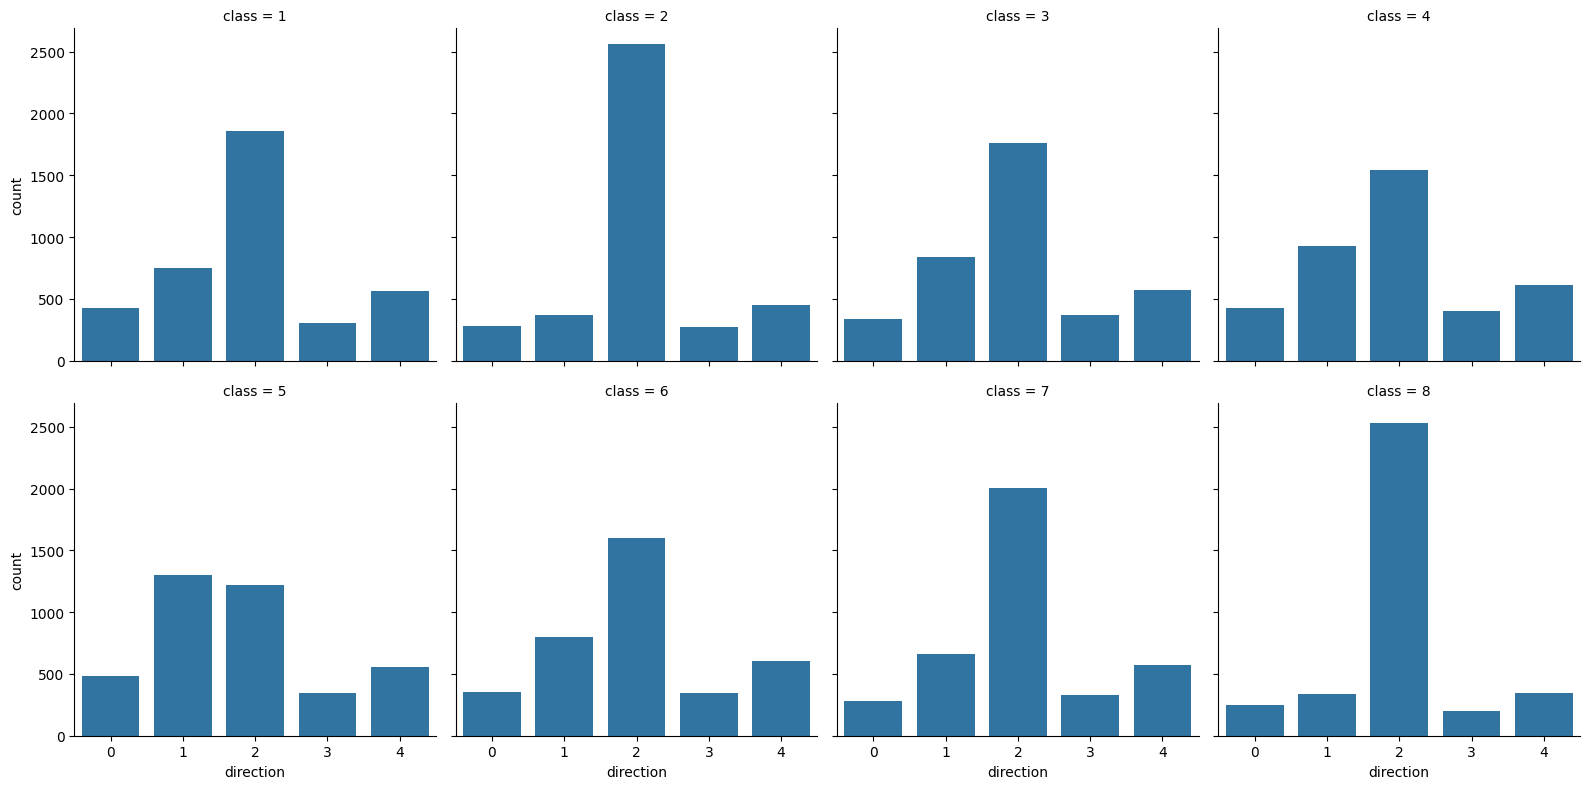

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create separate histograms for each class
g = sns.FacetGrid(direction_counts, col='class', col_wrap=4, height=4)
g.map(sns.barplot, 'direction', 'count')
plt.show()

There is clearly overrepresentation for direction class 2 (right) so we have to even the distribution to get clear result

### Approach 1: balanced distribution for each direction in each emotion class
not sure if this will work tbh :/

In [9]:
df.head()

,class,filename,pitch,yaw,roll,direction
0,1,image0012261.jpg,-0.214550,0.152226,0.103692,2
1,1,image0003195.jpg,0.207676,-0.255355,0.036119,2
2,1,image0010070.jpg,-0.204092,0.133176,-0.009492,0
3,1,image0017195.jpg,0.009019,0.060406,-0.076559,1
4,1,image0014177.jpg,-0.001475,0.212992,0.076477,2


In [10]:
grouped = df.groupby(['class', 'direction'])

min_count = grouped.size().min()

balanced_df = grouped.apply(lambda x: x.sample(n=min_count))

balanced_df = balanced_df.reset_index(drop=True)

print(balanced_df)

      class          filename     pitch       yaw      roll  direction
0         1  image0011746.jpg -0.003287  0.050022  0.022850          0
1         1  image0003515.jpg -0.050452  0.099889 -0.030883          0
2         1  image0010038.jpg -0.008647 -0.022158 -0.013608          0
3         1  image0012713.jpg  0.051667  0.007435  0.009731          0
4         1  image0010197.jpg  0.027524  0.046888  0.003699          0
...     ...               ...       ...       ...       ...        ...
8155      8  image0005049.jpg  0.019577 -0.369645 -0.024258          4
8156      8  image0042062.jpg -0.113471 -0.111218 -0.022709          4
8157      8  image0035184.jpg  0.070084 -0.230782  0.069103          4
8158      8  image0039126.jpg  0.205416 -0.527133  0.045189          4
8159      8  image0031990.jpg  0.041897 -0.397114  0.207451          4

[8160 rows x 6 columns]


In [11]:
direction_counts = balanced_df.groupby(['direction']).size().reset_index(name='count')
direction_counts

,direction,count
0,0,1632
1,1,1632
2,2,1632
3,3,1632
4,4,1632


In [12]:
direction_counts = balanced_df.groupby(['class', 'direction']).size().reset_index(name='count')
direction_counts

,class,direction,count
0,1,0,204
1,1,1,204
2,1,2,204
3,1,3,204
4,1,4,204
5,2,0,204
6,2,1,204
7,2,2,204
8,2,3,204
9,2,4,204


/home/sefni/miniconda3/envs/torch/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


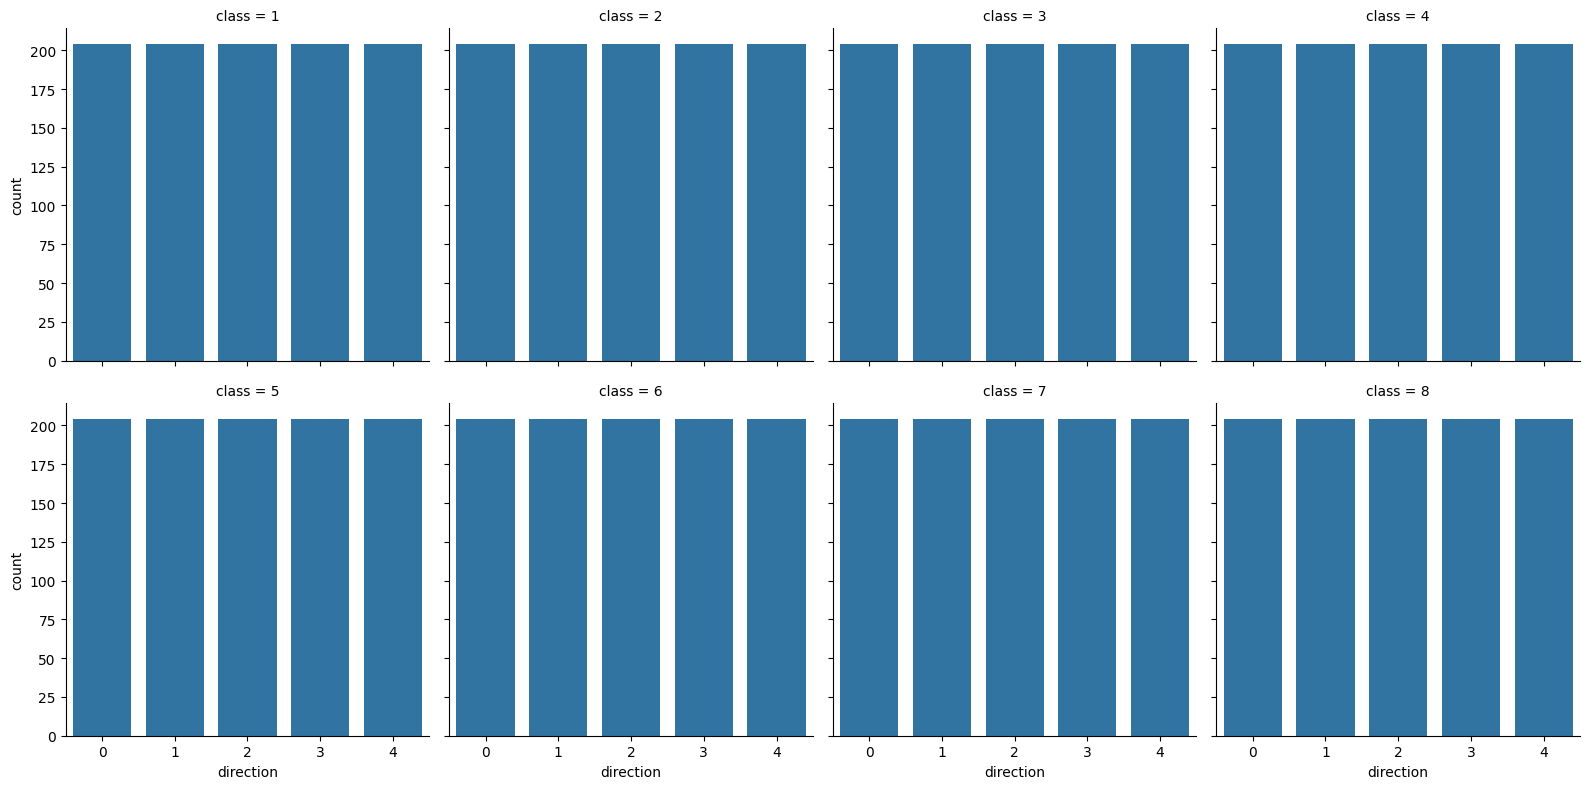

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(direction_counts, col='class', col_wrap=4, height=4)
g.map(sns.barplot, 'direction', 'count')
plt.show()

### Approach two: balanced distribution of directions whithout regard for emotion
might give better represantation I guess

In [14]:
grouped = df.groupby('direction')

min_count = grouped.size().min()

balanced_df = grouped.apply(lambda x: x.sample(n=min_count))

balanced_df = balanced_df.reset_index(drop=True)

print(balanced_df)

       class          filename     pitch       yaw      roll  direction
0          4  image0015421.jpg -0.186676  0.178181  0.006795          0
1          6  image0031535.jpg  0.035636  0.085401  0.036039          0
2          6  image0038675.jpg  0.141549  0.011920 -0.007344          0
3          1  image0008852.jpg -0.017228  0.034995  0.035296          0
4          1  image0015808.jpg  0.066162  0.031694  0.034566          0
...      ...               ...       ...       ...       ...        ...
12850      6  image0033191.jpg  0.094340 -0.588017  0.028842          4
12851      6  image0037078.jpg -0.156849 -0.298194  0.213167          4
12852      5  image0033267.jpg -0.001510 -0.205983 -0.042893          4
12853      4  image0030472.jpg -0.015205 -0.458039 -0.058769          4
12854      8  image0016446.jpg  0.169179 -0.274782  0.000419          4

[12855 rows x 6 columns]


In [15]:
direction_counts = balanced_df.groupby(['direction']).size().reset_index(name='count')
direction_counts

,direction,count
0,0,2571
1,1,2571
2,2,2571
3,3,2571
4,4,2571


In [16]:
direction_counts = balanced_df.groupby(['class', 'direction']).size().reset_index(name='count')
direction_counts

,class,direction,count
0,1,0,391
1,1,1,332
2,1,2,331
3,1,3,303
4,1,4,354
5,2,0,256
6,2,1,177
7,2,2,425
8,2,3,273
9,2,4,278


/home/sefni/miniconda3/envs/torch/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


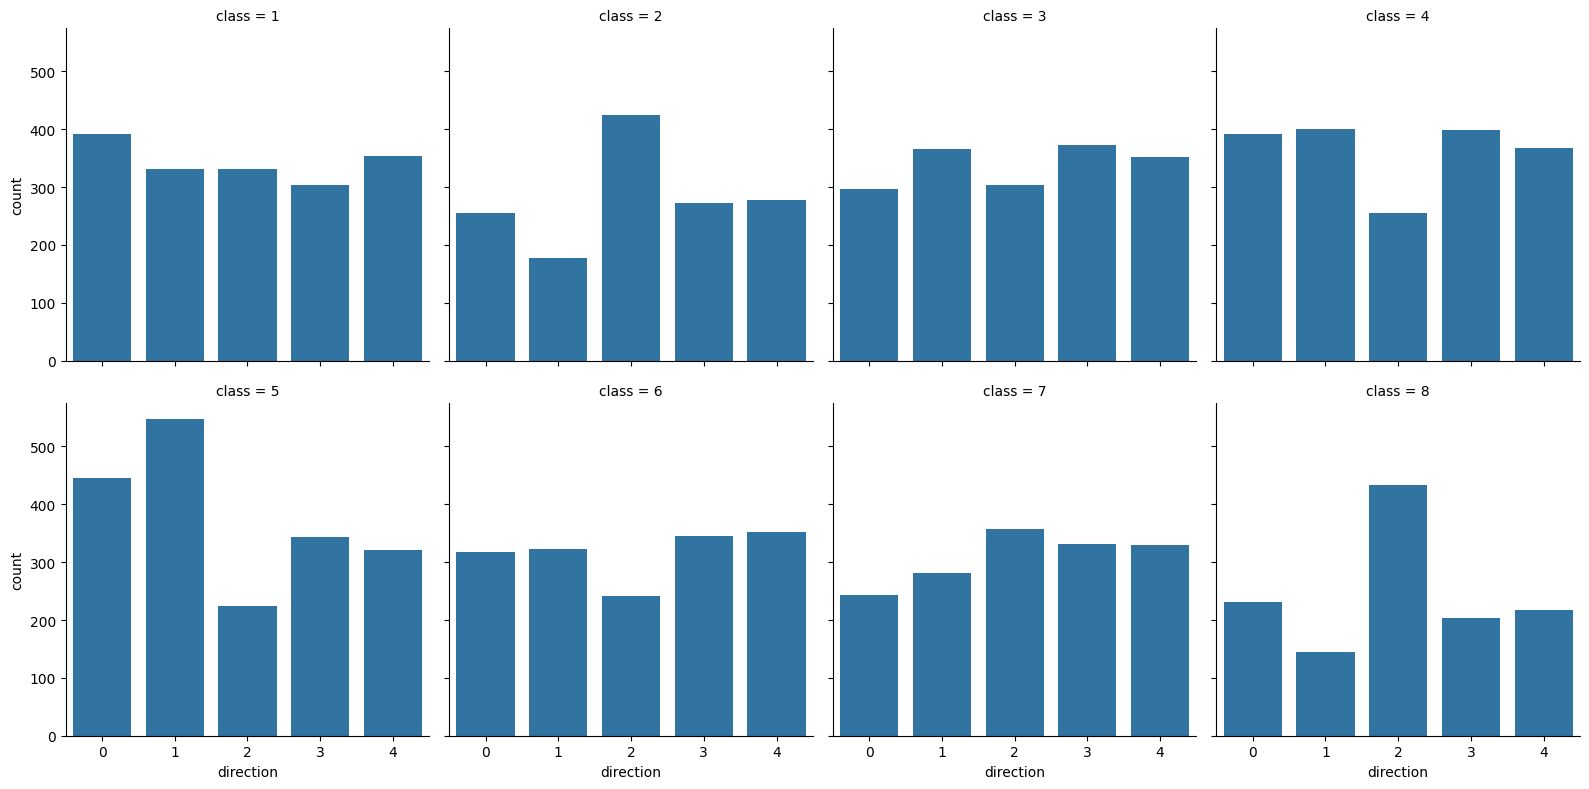

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create separate histograms for each class
g = sns.FacetGrid(direction_counts, col='class', col_wrap=4, height=4)
g.map(sns.barplot, 'direction', 'count')
plt.show()

In [18]:
balanced_df.head()

,class,filename,pitch,yaw,roll,direction
0,4,image0015421.jpg,-0.186676,0.178181,0.006795,0
1,6,image0031535.jpg,0.035636,0.085401,0.036039,0
2,6,image0038675.jpg,0.141549,0.011920,-0.007344,0
3,1,image0008852.jpg,-0.017228,0.034995,0.035296,0
4,1,image0015808.jpg,0.066162,0.031694,0.034566,0


In [20]:
balanced_df.to_csv("AffectNet_balanced_train.csv", index=False)

#### same for val

In [21]:
grouped = val_df.groupby('direction')

min_count = grouped.size().min()

balanced_df = grouped.apply(lambda x: x.sample(n=min_count))

balanced_df = balanced_df.reset_index(drop=True)

print(balanced_df)

      class          filename     pitch       yaw      roll  direction
0         7  image0000526.jpg -0.016940 -0.029193  0.018012          0
1         2  image0004039.jpg -0.065622  0.070577  0.006867          0
2         6  image0002812.jpg -0.054573  0.171232 -0.042992          0
3         4  image0002061.jpg -0.001486  0.104810  0.007792          0
4         2  image0003612.jpg  0.025797  0.089706 -0.003122          0
...     ...               ...       ...       ...       ...        ...
1620      5  image0000429.jpg -0.164133 -0.382281 -0.150819          4
1621      7  image0001686.jpg  0.043296 -0.407772  0.158526          4
1622      5  image0002902.jpg -0.027315 -0.102351 -0.017080          4
1623      2  image0000371.jpg  0.106822 -0.630513  0.042165          4
1624      6  image0002802.jpg  0.076643 -0.453756  0.272353          4

[1625 rows x 6 columns]


In [22]:
direction_counts = balanced_df.groupby(['direction']).size().reset_index(name='count')
direction_counts

,direction,count
0,0,325
1,1,325
2,2,325
3,3,325
4,4,325


In [23]:
direction_counts = balanced_df.groupby(['class', 'direction']).size().reset_index(name='count')
direction_counts

,class,direction,count
0,1,0,49
1,1,1,38
2,1,2,53
3,1,3,45
4,1,4,31
5,2,0,32
6,2,1,21
7,2,2,52
8,2,3,33
9,2,4,36


/home/sefni/miniconda3/envs/torch/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


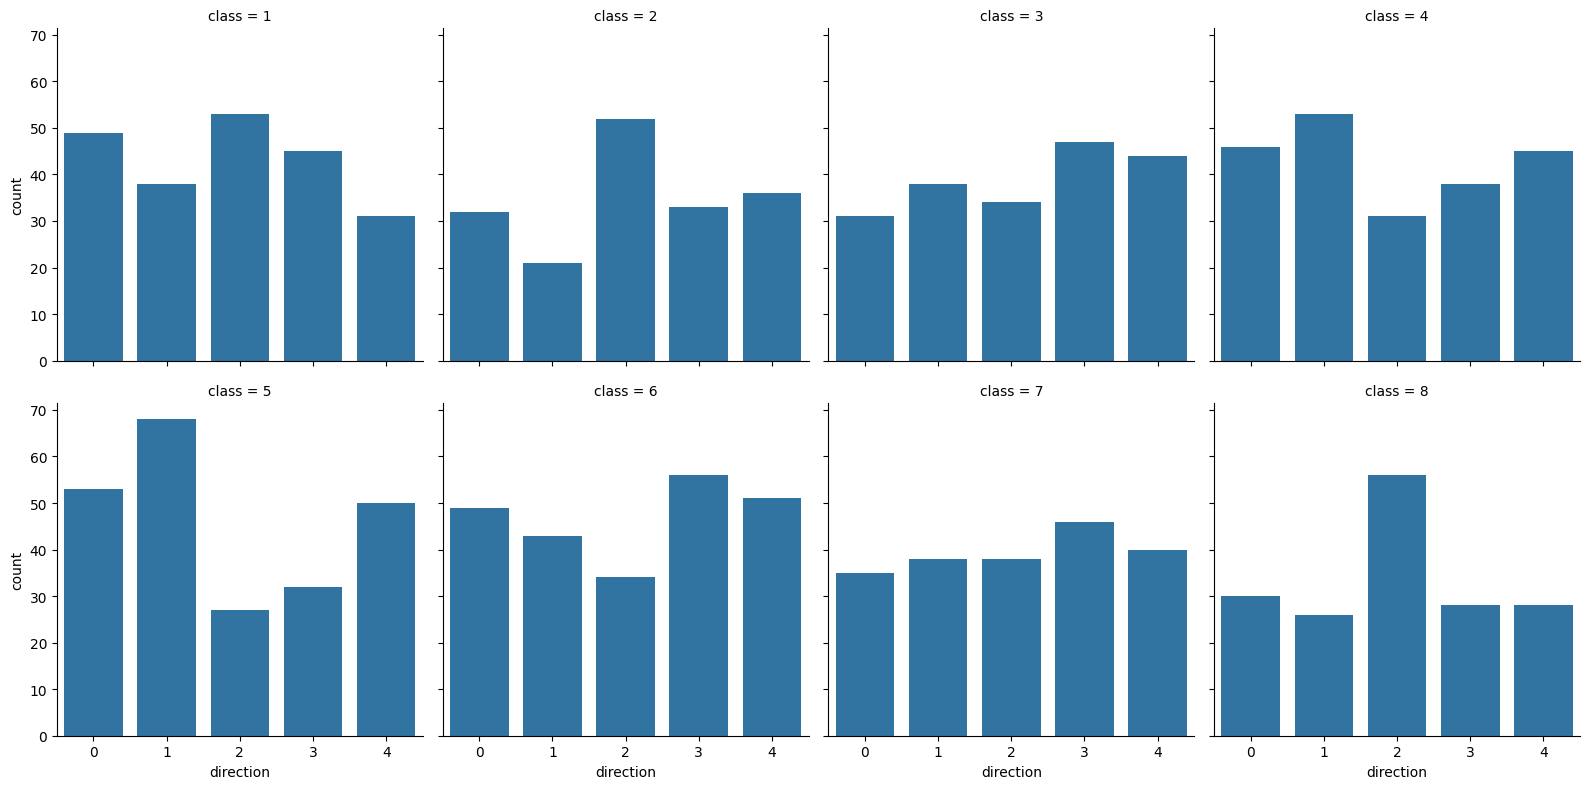

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create separate histograms for each class
g = sns.FacetGrid(direction_counts, col='class', col_wrap=4, height=4)
g.map(sns.barplot, 'direction', 'count')
plt.show()

In [25]:
balanced_df.to_csv("AffectNet_balanced_val.csv", index=False)